# San Francisco Crimen Classification
### Author: Cesar Gustavo Seminario Calle 

# Problem:
    From 1934 to 1963, San Francisco was infamous for housing some of the world's most notorious criminals on the inescapable island of Alcatraz.
    Today, the city is known more for its tech scene than its criminal past. But, with rising wealth inequality, housing shortages, and a proliferation of expensive digital toys riding BART to work, there is no scarcity of crime in the city by the bay.
    From Sunset to SOMA, and Marina to Excelsior, this competition's dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred

### Data fields
- Dates - timestamp of the crime incident
- Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.
- Descript - detailed description of the crime incident (only in train.csv)
- DayOfWeek - the day of the week
- PdDistrict - name of the Police Department District
- Resolution - how the crime incident was resolved (only in train.csv)
- Address - the approximate street address of the crime incident 
- X - Longitude
- Y - Latitude

## Importing Libraries and setting the data

In [30]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns

train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv', index_col='Id')

In [31]:
train.shape

(878049, 9)

In [32]:
train.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [33]:
test.shape

(884262, 6)

In [34]:
test.columns

Index(['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')

In [35]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [36]:
test.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


 # Exploratory Data Analysis
 ## Descriptive Analysis

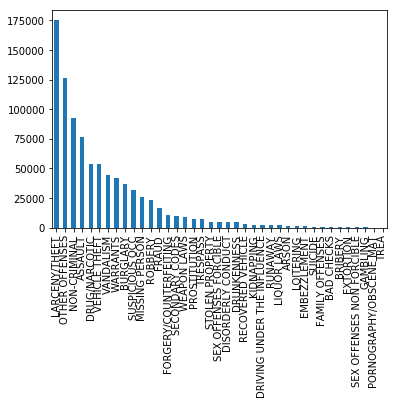

In [37]:
%matplotlib inline 
train.Category.value_counts().plot(kind='bar')

Larceny/Theft is the most frequent crime incident.

In [38]:
test.columns, train.columns

(Index(['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object'),
 Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
        'Resolution', 'Address', 'X', 'Y'],
       dtype='object'))

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin


train_pr = train.drop(['Descript','Resolution'],axis=1)
test_pr = test

coder = LabelEncoder()
coder.fit(train_pr['Category'])
header_predictions = coder.classes_

class ToNumeric(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.names=attribute_names
        
    def fit(self,X, y=None):
        return self
    
    def transform(self,X,y=None):
        for name in self.names:
            encoder = LabelEncoder()
            col_numeric= encoder.fit_transform(X[name])
            X.loc[:,name] = col_numeric
            
        return X
    
attributes = ['Category','DayOfWeek', 'PdDistrict', 'Address']
estimator = ToNumeric(attributes)
train_pr = estimator.transform(train_pr)

print(train_pr.head())

                 Dates  Category  DayOfWeek  PdDistrict  Address           X  \
0  2015-05-13 23:53:00        37          6           4    19790 -122.425892   
1  2015-05-13 23:53:00        21          6           4    19790 -122.425892   
2  2015-05-13 23:33:00        21          6           4    22697 -122.424363   
3  2015-05-13 23:30:00        16          6           4     4266 -122.426995   
4  2015-05-13 23:30:00        16          6           5     1843 -122.438738   

           Y  
0  37.774599  
1  37.774599  
2  37.800414  
3  37.800873  
4  37.771541  


    We dropped the feature Descript because it has the same data as Category, 
    for now it doesnt seem to be useful for our problem.
    Then, We create an estimator base on scikit structure to encode the categoric attributes to    numeric format.


In [40]:
encoder = LabelEncoder()
category_encoded = encoder.fit_transform(train_pr['Category'])
print(catvars_encoded)

dayweek_encoded = encoder.fit_transform(train_pr['DayOfWeek'])
print(dayweek_encoded)

[37 21 21 ..., 16 35 12]
[6 6 6 ..., 1 1 1]


##  Modeling

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

train_X= train_pr.drop(['Category','Dates'],axis=1)
train_y=train_pr['Category']



rf = RandomForestClassifier()
rf.fit(train_X,train_y)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [42]:
test_X=test_pr.drop('Dates',axis=1)
attributes = ['DayOfWeek', 'PdDistrict', 'Address']
estimator = ToNumeric(attributes)
test_X = estimator.transform(test_X)


In [43]:
predictions = rf.predict(test_X)
print(predictions)


[36 21 27 ...,  4 38 16]


In [44]:
test_X.columns, train_X.columns

(Index(['DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object'),
 Index(['DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object'))

In [54]:
data_submissions = pd.get_dummies(predictions)

In [55]:
data_submissions.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data_submissions.columns = header_predictions
data_submissions.shape

(884262, 39)

In [61]:
data_submissions.to_csv('submission1.csv',index_label="Id")